<span style="font-size:110%; text-align:left;"><b><a href="../index.html">3. Advanced topics</a> > <a href="./index.html">3. Reduced order modelling</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>Making a reduced order model of a mirror map</b></span>
<br/><br/>
<span style="font-size:110%; text-align:left;">Author: Daniel Brown </span>

This notebook demonstrates how you can take a mirror map you are using in Finesse and make a reduced order model (ROM) of it. In the end this allows us to make a reduced order quadrature rule for efficiently calculating the modal scattering of an incoming beam. The output of this process will be the weights for this quadrature rule which can be used in both Finesse or Pykat. This assumes that you already have:
* A processed mirror map
* A suitable empirical interpolant to make your reduced order model
* Finesse v2.1 or more recent
* Pykat v1.0 or more recent

These topics are covered in other notebooks. In this tutorial we will be using a previously generated empirical interpolant for the advanced LIGO arm cavities. These have been generated for both the ITM and ETM for a range of cavity states likely to be seen in the aLIGO arm cavities. You can get these for yourself in the subfolder <a href="./aligo_arm/">aligo_arm</a>.

First we need to import some basics:

In [1]:
import pykat
import pickle
from pykat.optics.maps import read_map
from pykat.optics.romhom import read_EI

pykat.init_pykat_plotting()

                                              ..-
    PyKat 1.1.349         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



Then we need to define what map, output and empirical interpolant we will be using:

In [2]:
map_file     = "etm08_virtual.map" 
outfile_file = "etm08_virtual"          # Code will append the '.rom' file extension
EI_file      = "aligo_arm/ETM_14_EI.p"

Reading the map in we should double check we have the correct map:

/Users/adf/work/git/pykat/pykat/optics/maps.py:476: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(zmin, zmax)


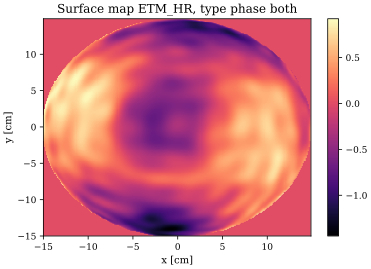

In [3]:
m = read_map(map_file)
fig = m.plot()

It is a good idea to check the limits and ranges of the empirical interpolant you are using. This can be done with the helper function to read an EI in:

In [4]:
ei = read_EI(EI_file, verbose=True)

Map data this ROM was made for in one dimension:
    Map separation dx = 0.0002671118530884753
    x range = -0.16m to 0.16m
    Data points = 1200

Parameter limits:
    w0 = 0.00475760053546656m to 0.0120370407341722m
    z  = 2110.4275m to 2202.60826923077m
    max order  = 14

ROM contains 28 basis modes


In [5]:
print(m.size)
print(m.x.max(), m.x.min())

(256, 256)
0.14882514625999999 -0.15000170374000002


Above we can see the map size and also the map size that the ROM was produced for. The map we are using doesn't have the same number of points but has the same range. Small differences like this can easily be fixed by interpolating our current map data. This is done internally in the code when using the `interpolate=True` argument as seen below.

We are now ready to generate the weights for an efficient quadrature rule:

In [6]:
m.generateROMWeights(EI_file, verbose=True, interpolate=True)

Computing weights: 100%|#########################################|Time: 0:00:04
Computing weights: 100%|#########################################|Time: 0:00:03
Computing weights: 100%|#########################################|Time: 0:00:03
Computing weights: 100%|#########################################|Time: 0:00:03


Finally, we can just write these weights to a file:

In [7]:
m.ROMWeights.writeToFile(outfile_file)

This weights file can then be used in Finesse instead of the original map file. This will result in faster numerical integration that is required to compute higher order mode scattering.